# Analysis of Novel Coronavirus 2019 

### Content
+ Introduction: Novel coronavirus 2019
+ Data description
+ Research questions
+ Data preparation: cleaning and shaping
+ Data visualization

## 1. Introduction: COVID-19

2019-nCoV or COVID-19 (2019 Novel Coronavirus) is a virus identified as the cause of an outbreak of respiratory illness first detected in Wuhan, China. Early on, many of the patients in the outbreak in Wuhan, China reportedly had some link to a large seafood and animal market, suggesting animal-to-person spread. However, a growing number of patients reportedly have not had exposure to animal markets, indicating person-to-person spread is occurring. At this time, it’s unclear how easily or sustainably this virus is spreading between people.

There is an ongoing investigation to determine more about this outbreak. This is a rapidly evolving situation and information will be updated as it becomes available. The latest situation summary updates are available on CDC’s web page for COVID-19.

Source(https://www.cdc.gov/library/researchguides/2019NovelCoronavirus.html)

## 2. Data description

This dataset has daily level information on the number of affected cases, deaths and recovery from 2019 novel coronavirus. Please note that this is a time series data and so the number of cases on any given day is the cumulative number.

The data is available from 22 Jan, 2020.

The detailed description of the variables in this dataset is below:
+ Sno - Serial number
+ ObservationDate - Date of the observation in MM/DD/YYYY
+ Province/State - Province or state of the observation (Could be empty when missing)
+ Country/Region - Country of observation
+ Last Update - Time in UTC at which the row is updated for the given province or country. (Not standardised and so please clean before using it)
+ Confirmed - Cumulative number of confirmed cases till that date
+ Deaths - Cumulative number of of deaths till that date
+ Recovered - Cumulative number of recovered cases till that date

## 3. Research questions

Research questions for the project:
1. Analyze daily information about cases of coronavirus by period of time
2. Analyze the most frequent regions in the list
3. Analyze ratio of the number of deaths to recovered cases
4. Analyze daily change of confirmed cases by regions
5. Analyze relation between variables in the dataset 

## 4. Data preparation: cleaning and shaping

In [48]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns

In [49]:
# import dataset
cov = pd.read_csv('covid_19_data.csv')

In [50]:
# number of rows, columns, data types, memory usage information
cov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116805 entries, 0 to 116804
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              116805 non-null  int64  
 1   ObservationDate  116805 non-null  object 
 2   Province/State   81452 non-null   object 
 3   Country/Region   116805 non-null  object 
 4   Last Update      116805 non-null  object 
 5   Confirmed        116805 non-null  float64
 6   Deaths           116805 non-null  float64
 7   Recovered        116805 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 7.1+ MB


So we obtain the following information:
1. There are 116805 records and 8 columns
2. There are missing values in Province/State column

In [51]:
# dropping
cov = cov.dropna()

In [52]:
# show dataset
cov

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
116800,116801,09/23/2020,Zaporizhia Oblast,Ukraine,2020-09-24 04:23:38,3149.0,49.0,1158.0
116801,116802,09/23/2020,Zeeland,Netherlands,2020-09-24 04:23:38,1270.0,72.0,0.0
116802,116803,09/23/2020,Zhejiang,Mainland China,2020-09-24 04:23:38,1282.0,1.0,1272.0
116803,116804,09/23/2020,Zhytomyr Oblast,Ukraine,2020-09-24 04:23:38,5191.0,92.0,2853.0


In [53]:
# describe numerical columns
cov.describe()

,SNo,Confirmed,Deaths,Recovered
count,81452.000000,8.145200e+04,81452.000000,8.145200e+04
mean,63020.428056,1.950380e+04,802.709105,1.114304e+04
std,32304.171786,6.044557e+04,2780.366795,7.052453e+04
min,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,37698.750000,3.150000e+02,3.000000,0.000000e+00
50%,64318.500000,2.622000e+03,52.000000,3.490000e+02
75%,90562.250000,1.064950e+04,406.000000,3.655250e+03
max,116805.000000,1.242770e+06,42072.000000,2.670256e+06


From the description above we can obtain:
- the total count of confirmed and recovered cases, and deaths;
- mean value for each of the columns;
- min and max values.

### Data cleaning and shaping

In [54]:
# check if there are still any NaN values
df=pd.DataFrame(cov)
print(df.isnull().any(axis=1).sum())

0


We checked for missing values and found the sum of total number of them. From this we can obtain that there are no NaN values in the dataset 

In [55]:
# check if there any duplicates
duplicateRows = df[df.duplicated()]
print(duplicateRows.sum())

SNo                0.0
ObservationDate    0.0
Province/State     0.0
Country/Region     0.0
Last Update        0.0
Confirmed          0.0
Deaths             0.0
Recovered          0.0
dtype: float64


Duplicates are not found in the dataset

In [56]:
# number of confirmed,deaths,recovered cases have to be a whole number
df['Confirmed'] = df['Confirmed'].astype(int)
df['Deaths'] = df['Deaths'].astype(int)
df['Recovered'] = df['Recovered'].astype(int)
df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1,0,0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14,0,0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6,0,0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1,0,0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0,0,0
...,...,...,...,...,...,...,...,...
116800,116801,09/23/2020,Zaporizhia Oblast,Ukraine,2020-09-24 04:23:38,3149,49,1158
116801,116802,09/23/2020,Zeeland,Netherlands,2020-09-24 04:23:38,1270,72,0
116802,116803,09/23/2020,Zhejiang,Mainland China,2020-09-24 04:23:38,1282,1,1272
116803,116804,09/23/2020,Zhytomyr Oblast,Ukraine,2020-09-24 04:23:38,5191,92,2853


In [57]:
# rename column name to game_name
df=pd.DataFrame(cov)
df['Country/Region'] = df.rename(columns = {'Country/Region':'Region'}, inplace = True) 
df['Province/State'] = df.rename(columns = {'Province/State':'Province'}, inplace = True)
df

,SNo,ObservationDate,Province,Region,Last Update,Confirmed,Deaths,Recovered,Country/Region,Province/State
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1,0,0,None,None
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14,0,0,None,None
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6,0,0,None,None
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1,0,0,None,None
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0,0,0,None,None
...,...,...,...,...,...,...,...,...,...,...
116800,116801,09/23/2020,Zaporizhia Oblast,Ukraine,2020-09-24 04:23:38,3149,49,1158,None,None
116801,116802,09/23/2020,Zeeland,Netherlands,2020-09-24 04:23:38,1270,72,0,None,None
116802,116803,09/23/2020,Zhejiang,Mainland China,2020-09-24 04:23:38,1282,1,1272,None,None
116803,116804,09/23/2020,Zhytomyr Oblast,Ukraine,2020-09-24 04:23:38,5191,92,2853,None,None


## 5. Data visualization 

In this section, I will respond to the research questions by data visualization

### 5.1 Q1: Distribution of daily information about cases of coronavirus by period of time

In [66]:
# Changing the datatype of column to datetime
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])
# Extracting of month values from the column
df['month'] = df['ObservationDate'].dt.month
# Getting the number of daily information by the regions in month
month_count = df.groupby('month')['SNo'].nunique().sort_values(ascending = False)
month_count

month
8    17804
7    17573
6    16278
9    13205
5     6706
4     4173
3     3750
2     1573
1      390
Name: SNo, dtype: int64

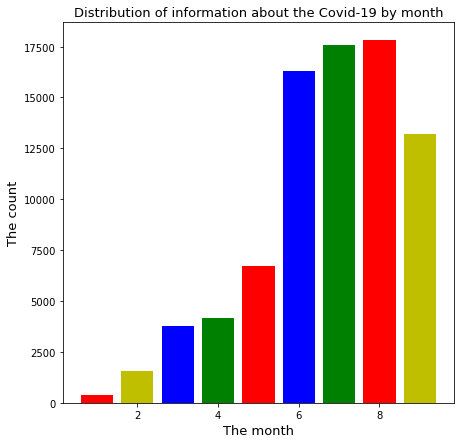

In [67]:
# The barplot of distribution of information about the Covid-19 by month
plot.figure(figsize = (7,7))
colors=['r','g','b','y']
plot.bar(month_count.index,month_count,color = colors)
plot.title('Distribution of information about the Covid-19 by month',fontsize = 13)
plot.xlabel('The month', fontsize = 13)
plot.ylabel('The count', fontsize = 13)
plot.show()

The 8th month of calendar (August) had the highest distribution of daily cases of coronavirus, while the 1st month (January) had the least distrubution. The distribution has been raising month by month except for September.

### Q2: 5.2 Analyze the most frequent regions in the list

In [68]:
# select Region column
country = df["Region"]
country

0         Mainland China
1         Mainland China
2         Mainland China
3         Mainland China
4         Mainland China
               ...      
116800           Ukraine
116801       Netherlands
116802    Mainland China
116803           Ukraine
116804       Netherlands
Name: Region, Length: 81452, dtype: object

In [69]:
# describe the column
country.describe()

count     81452
unique       30
top          US
freq      12356
Name: Region, dtype: object

There are 81452 values overall for the region names and 30 of them are unique. The top one is the United States, which appears with the frequency of 12356 times.

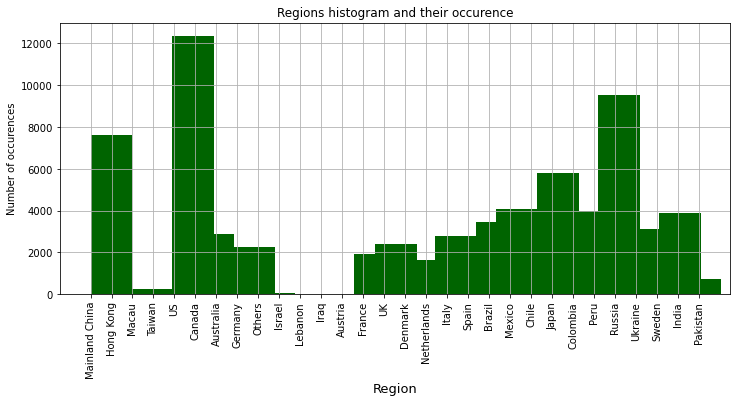

In [70]:
# histogram of countries in the list and their occurence
plot.figure(figsize = (12,5))
plot.hist(df["Region"], bins=30, width = 2.0, range=None, align='mid', color = 'darkgreen')
plot.xlabel("Region", fontsize=13)
plot.xticks(rotation='vertical')
plot.ylabel("Number of occurences")
plot.title("Regions histogram and their occurence")
plot.ylim(0, 13000)
plot.grid(True)

plot.show()

The histogram shows the distribution of occurences per country. The United States has a leading amount with more than 12000 occurences. The data for different countries can be easily obtained from the constructed histogram. 